# Wiki-large

https://huggingface.co/datasets/bogdancazan/wikilarge-text-simplification

In [3]:
from datasets import load_dataset

wiki_dataset = load_dataset("bogdancazan/wikilarge-text-simplification")

In [4]:
wiki_dataset

DatasetDict({
    train: Dataset({
        features: ['Normal', 'Simple'],
        num_rows: 148843
    })
    validation: Dataset({
        features: ['Normal', 'Simple'],
        num_rows: 494
    })
    test: Dataset({
        features: ['Normal', 'Simple'],
        num_rows: 191
    })
})

In [22]:
import pandas as pd
from datasets import Dataset

# datasets to pandas DataFrames
train_df = wiki_dataset['train'].to_pandas()
val_df = wiki_dataset['validation'].to_pandas()
test_df = wiki_dataset['test'].to_pandas()

# Check alignment

In [30]:
from bert_score import score
from tqdm.notebook import tqdm
import logging

# suppress warinings
logging.getLogger("transformers.modeling_utils").setLevel(logging.ERROR)


def compute_bertscore(r_texts, s_texts, batch_size=32):
    f1_scores = []
    for i in tqdm(range(0, len(r_texts), batch_size)):
        r_batch = r_texts[i:i+batch_size]
        s_batch = s_texts[i:i+batch_size]
        _, _, F1 = score(s_batch, r_batch, lang="en", verbose=False)
        f1_scores.extend(F1.numpy())
    return f1_scores


f1_scores = compute_bertscore(wiki_dataset['test']['Normal'], wiki_dataset['test']['Simple'])

  0%|          | 0/6 [00:00<?, ?it/s]

In [31]:
import pandas as pd

df_scores = pd.DataFrame({
    'r_content': wiki_dataset['test']['Normal'],
    's_content': wiki_dataset['test']['Simple'],
    'bert_score': f1_scores
})

df_scores.to_csv('../data/bert_scores/bert_scores_wiki-test.csv', index=False)

# Train dataset

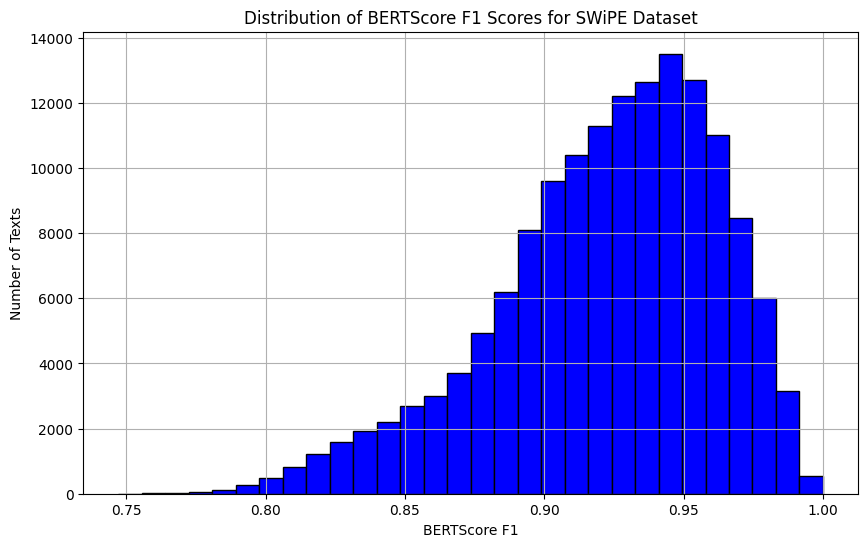

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_scores['bert_score'], bins=30, color='blue', edgecolor='black')
plt.title("Distribution of BERTScore F1 Scores for SWiPE Dataset")
plt.xlabel("BERTScore F1")
plt.ylabel("Number of Texts")
plt.grid(True)
plt.show()

In [16]:
for idx, row in df_scores[(df_scores['bert_score']>0.86) & (df_scores['bert_score']<0.9)].iterrows():
    print("ID = ", idx)
    print("Bscore = ", row['bert_score'])
    print("Raw: ",row['r_content'], end='\n\n')
    print("Simplified: ", row['s_content'], end='\n\n')
    print("\n\n")

ID =  2
Bscore =  0.8781485557556152
Raw:  before persephone was released to hermes who had been sent to retrieve her hades tricked her into eating pomegranate seeds lrb six or three according to the telling rrb which forced her to return to the underworld for a period each year.

Simplified:  when demeter went to the underworld to rescue her persephone hades forced persephone to eat the pomegranate. after she ate this fruit it was supposed to keep her in the underworld with hades so she would be forced to marry him.




ID =  6
Bscore =  0.8711453676223755
Raw:  a scythe lrb oxford english dictionary oxford university press scythe rrb is an agricultural hand tool for mowing grass reaping crops or reaping people lrb i.e. the grim reaper rrb.

Simplified:  a scythe lrb from old english si eoxford english dictionary. rrb 




ID =  20
Bscore =  0.8790035247802734
Raw:  on july the palace announced that king george tupou v would relinquish much of his power and would surrender his role in

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [20]:
indices_to_delete = df_scores[df_scores['bert_score']<=0.9].index.tolist()
print("Num records to delete: ", len(indices_to_delete))

Num records to delete:  38556


In [23]:
print("Num of records: ", len(train_df))
train_df.drop(indices_to_delete, inplace=True)
print("Num of records: ", len(train_df))

Num of records:  148843
Num of records:  110287


# Validation dataset

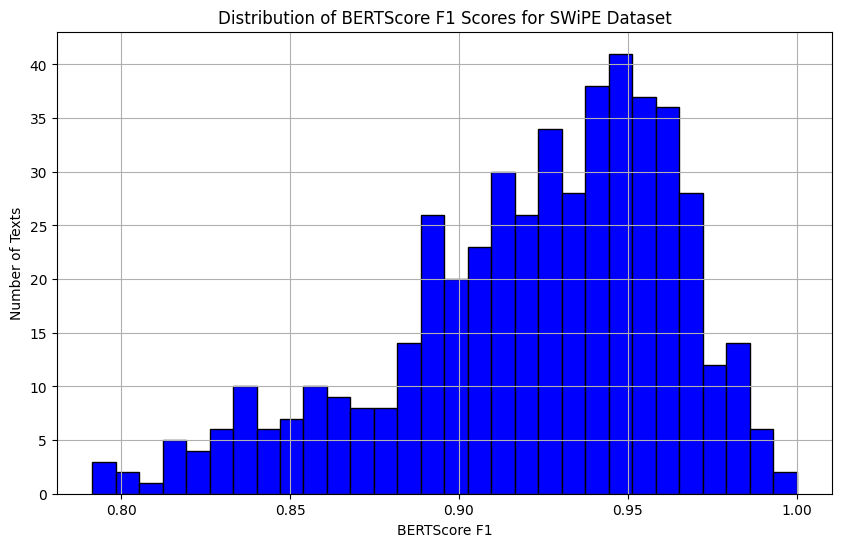

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_scores['bert_score'], bins=30, color='blue', edgecolor='black')
plt.title("Distribution of BERTScore F1 Scores for SWiPE Dataset")
plt.xlabel("BERTScore F1")
plt.ylabel("Number of Texts")
plt.grid(True)
plt.show()

In [27]:
for idx, row in df_scores[(df_scores['bert_score']>0.86) & (df_scores['bert_score']<0.9)].iterrows():
    print("ID = ", idx)
    print("Bscore = ", row['bert_score'])
    print("Raw: ",row['r_content'], end='\n\n')
    print("Simplified: ", row['s_content'], end='\n\n')
    print("\n\n")

ID =  0
Bscore =  0.8671440482139587
Raw:  upper sorbian is a minority language spoken by sorbs in germany in the historical province of upper lusatia lrb hornja u ica in sorbian rrb which is today part of saxony.

Simplified:  there are around speakers of upper sorbian living in saxony. upper sorbian is a minority language in germany according to the european charter for regional or minority languages.




ID =  2
Bscore =  0.8880445957183838
Raw:  a shoe is an item of footwear evolved at first to protect the human foot and later additionally as an item of decoration in itself.

Simplified:  a shoe is also an item of clothing.




ID =  8
Bscore =  0.8922438621520996
Raw:  the summer of love became a defining moment of the s as the hippie counterculture movement came into public awareness.

Simplified:  thousands of young people from all over the world went to san francisco to help create a hippie counterculture. the summer of love made the rest of america much more aware of the hippi

In [28]:
indices_to_delete = df_scores[df_scores['bert_score']<=0.88].index.tolist()
print("Num records to delete: ", len(indices_to_delete))

Num records to delete:  79


In [29]:
print("Num of records: ", len(val_df))
val_df.drop(indices_to_delete, inplace=True)
print("Num of records: ", len(val_df))

Num of records:  494
Num of records:  415


# Test dataset

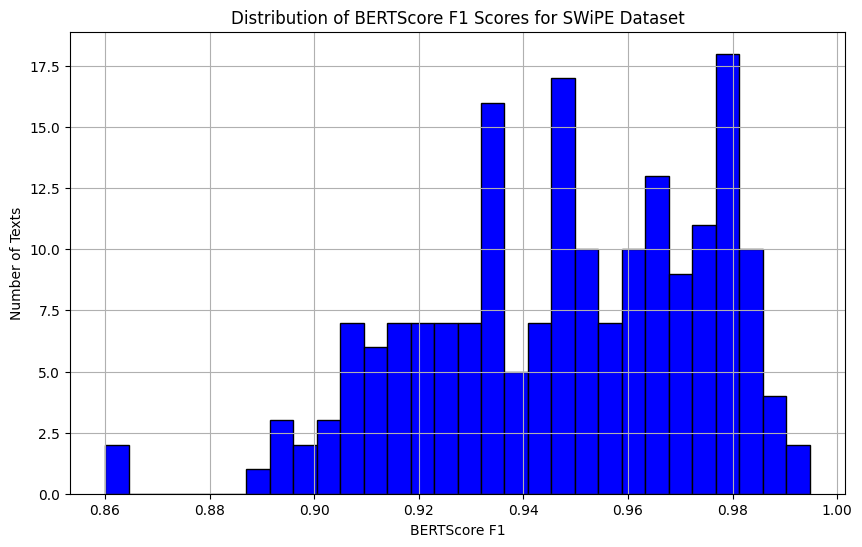

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_scores['bert_score'], bins=30, color='blue', edgecolor='black')
plt.title("Distribution of BERTScore F1 Scores for SWiPE Dataset")
plt.xlabel("BERTScore F1")
plt.ylabel("Number of Texts")
plt.grid(True)
plt.show()

In [35]:
for idx, row in df_scores[df_scores['bert_score']<0.89].iterrows():
    print("ID = ", idx)
    print("Bscore = ", row['bert_score'])
    print("Raw: ",row['r_content'], end='\n\n')
    print("Simplified: ", row['s_content'], end='\n\n')
    print("\n\n")

ID =  68
Bscore =  0.8600444197654724
Raw:  the four canonical texts are the gospel of matthew gospel of mark gospel of luke and gospel of john probably written between ad and lrb see also the gospel according to the hebrews rrb.

Simplified:  gospels matthew mark luke and john were most likey written after christ




ID =  166
Bscore =  0.8600797653198242
Raw:  the term protein itself was coined by berzelius after mulder observed that all proteins seemed to have the same empirical formula and might be composed of a single type of lrb very large rrb molecule.

Simplified:  the term protein was made by berzelius after mulder






In [36]:
indices_to_delete = df_scores[df_scores['bert_score']<=0.88].index.tolist()
print("Num records to delete: ", len(indices_to_delete))

Num records to delete:  2


In [37]:
print("Num of records: ", len(test_df))
test_df.drop(indices_to_delete, inplace=True)
print("Num of records: ", len(test_df))

Num of records:  191
Num of records:  189


# Clean-up text

In [38]:
import re

def clean_text(text):
    # remove script errors or unwanted modules
    text = re.sub(r'Script error: No such module.*\.\n', '', text)
    
    # remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    # remove redundant spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [42]:
train_df['Normal'] = train_df['Normal'].apply(clean_text)
train_df['Simple'] = train_df['Simple'].apply(clean_text)

val_df['Normal'] = val_df['Normal'].apply(clean_text)
val_df['Simple'] = val_df['Simple'].apply(clean_text)

test_df['Normal'] = test_df['Normal'].apply(clean_text)
test_df['Simple'] = test_df['Simple'].apply(clean_text)

# Save changes

In [44]:
from datasets import DatasetDict

train_dataset = Dataset.from_pandas(train_df.reset_index(drop=True))
val_dataset = Dataset.from_pandas(val_df.reset_index(drop=True))
test_dataset = Dataset.from_pandas(test_df.reset_index(drop=True))

wiki_dataset_cleaned = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset,
})

In [45]:
wiki_dataset_cleaned

DatasetDict({
    train: Dataset({
        features: ['Normal', 'Simple'],
        num_rows: 110287
    })
    validation: Dataset({
        features: ['Normal', 'Simple'],
        num_rows: 415
    })
    test: Dataset({
        features: ['Normal', 'Simple'],
        num_rows: 189
    })
})

In [46]:
wiki_dataset_cleaned.save_to_disk("../data/wiki-large_clean")

Saving the dataset (0/1 shards):   0%|          | 0/110287 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/415 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/189 [00:00<?, ? examples/s]